In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit.Chem import rdFingerprintGenerator

In [2]:
drug_dataframe = pd.read_csv('./fda_prop.xls',sep='\t')
drug_dataframe

,ZINC_ID,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB,SMILES
0,ZINC00000018,212.318,2.00,5.91,-8.69,1,3,32,0,4,CC(C)C[C@@H]1C(=O)N(C(=S)N1)CC=C
1,ZINC00000036,151.141,0.37,2.61,-46.53,1,3,60,-1,2,c1ccc(cc1)[C@@H](C(=O)[O-])O
2,ZINC00000053,179.151,1.43,5.65,-56.66,0,4,66,-1,3,CC(=O)Oc1ccccc1C(=O)[O-]
3,ZINC00000061,213.664,-0.42,3.92,-52.87,3,3,68,0,4,c1cc(ccc1[C@@H](CC(=O)[O-])C[NH3+])Cl
4,ZINC00000070,300.721,4.53,-0.61,-46.43,0,4,66,-1,3,C[C@@H](c1ccc2c(c1)nc(o2)c3ccc(cc3)Cl)C(=O)[O-]
...,...,...,...,...,...,...,...,...,...,...,...
3175,ZINC15848267,392.467,2.09,2.69,-17.09,3,5,95,0,2,C[C@H]1C[C@@H]2[C@@H]3C[C@H](C4=CC(=O)C=C[C@]4...
3176,ZINC15848268,392.467,2.09,3.20,-16.23,3,5,95,0,2,C[C@@H]1C[C@H]2[C@@H]3C[C@H](C4=CC(=O)C=C[C@]4...
3177,ZINC15848269,392.467,2.09,2.89,-14.46,3,5,95,0,2,C[C@H]1C[C@H]2[C@@H]3C[C@H](C4=CC(=O)C=C[C@]4(...
3178,ZINC15848271,312.864,5.08,13.35,-41.48,1,1,4,1,5,c1ccc(cc1)/C(=C/C[NH+]2CCCC2)/Cc3ccc(cc3)Cl


In [3]:
drug_dataframe.sort_values('NRB', ascending=False)

,ZINC_ID,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB,SMILES
1320,ZINC03830276,603.750,1.57,-4.15,-20.52,1,12,121,0,33,CCCCNc1ccc(cc1)C(=O)OCCOCCOCCOCCOCCOCCOCCOCCOCCOC
2601,ZINC08101159,495.745,9.76,3.84,-18.66,1,6,81,0,23,CCCCCCCCCCC[C@@H](C[C@@H]1[C@@H](C(=O)O1)CCCCC...
1621,ZINC03830635,561.701,-1.31,-10.48,-65.57,8,14,207,1,23,CC(=O)N(CCCCCNC(=O)CCC(=O)N(CCCCCNC(=O)CCC(=O)...
2604,ZINC08101162,495.745,9.76,3.72,-17.86,1,6,81,0,23,CCCCCCCCCCC[C@H](C[C@H]1[C@@H](C(=O)O1)CCCCCC)...
2603,ZINC08101161,495.745,9.76,3.84,-12.85,1,6,81,0,23,CCCCCCCCCCC[C@@H](C[C@H]1[C@@H](C(=O)O1)CCCCCC...
...,...,...,...,...,...,...,...,...,...,...,...
1220,ZINC03812897,296.410,3.66,-1.04,-5.88,2,2,40,0,0,C[C@]12CC[C@@H]3c4ccc(cc4CC[C@H]3[C@@H]1CC[C@]...
2474,ZINC05735567,312.453,3.54,1.22,-6.37,1,2,37,0,0,C[C@@H]1CC2=C(CCC(=O)C2)[C@@H]3[C@H]1[C@@H]4CC...
741,ZINC01041156,274.404,3.00,7.58,-5.96,1,2,37,0,0,C[C@@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C...
734,ZINC00968337,291.418,3.47,1.61,-35.90,1,2,17,1,0,C[NH+]1CCC(=C2c3ccccc3CCc4c2nccc4)CC1


In [4]:
def mol_from_smiles(item):
    return Chem.MolFromSmiles(item)

drug_dataframe['rdkit_object'] = drug_dataframe['SMILES'].apply(mol_from_smiles)

<Axes: >

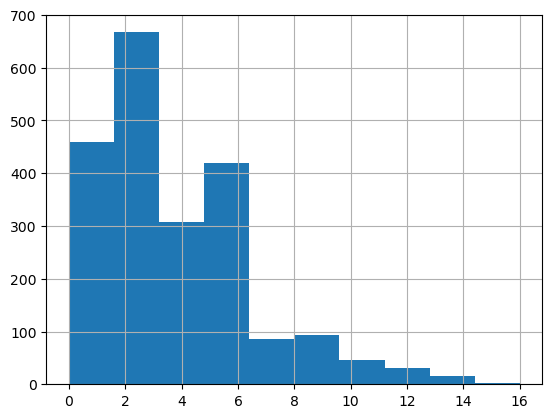

In [5]:
Mw_bool = drug_dataframe['MWT' ] < 400
drug_dataframe = drug_dataframe[Mw_bool]
drug_dataframe['NRB'].hist()


In [6]:
nrb_filter = drug_dataframe['NRB'] > 6
drug_dataframe = drug_dataframe[nrb_filter]
drug_dataframe

,ZINC_ID,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB,SMILES,rdkit_object
23,ZINC00000257,296.387,2.06,-1.05,-44.37,3,5,72,1,10,CC(C)[NH2+]C[C@H](COc1ccc(cc1)CCC(=O)OC)O,<rdkit.Chem.rdchem.Mol object at 0x165c49af0>
27,ZINC00000276,277.432,3.13,2.41,-33.39,2,3,33,1,7,CCC[NH+](CC)[C@@H](CC)C(=O)Nc1c(cccc1C)C,<rdkit.Chem.rdchem.Mol object at 0x165c49cb0>
37,ZINC00000380,297.398,3.86,2.98,-8.13,0,3,39,0,7,CC(C)Cc1ccc(cc1)[C@H](C)C(=O)OCc2ccccn2,<rdkit.Chem.rdchem.Mol object at 0x165c4a110>
38,ZINC00000407,302.394,2.77,-3.11,-38.26,4,4,66,1,7,C[C@H](COc1ccccc1)[NH2+][C@@H](C)[C@H](c2ccc(c...,<rdkit.Chem.rdchem.Mol object at 0x165c4a180>
40,ZINC00000416,329.420,2.85,-5.28,-59.36,6,5,100,1,8,C[C@H](CCc1ccccc1)[NH2+]C[C@H](c2ccc(c(c2)C(=O...,<rdkit.Chem.rdchem.Mol object at 0x165c4a260>
...,...,...,...,...,...,...,...,...,...,...,...,...
3129,ZINC15848220,367.506,3.50,5.05,-53.35,3,5,101,-1,12,CCCCC[C@@](C)(/C=C/[C@H]1[C@H](C[C@H]([C@@H]1C...,<rdkit.Chem.rdchem.Mol object at 0x165cb74c0>
3150,ZINC15848242,351.463,3.83,6.26,-49.51,2,5,90,-1,10,CCCCC[C@H](/C=C/[C@H]1[C@H](C[C@H]2[C@@H]1C/C(...,<rdkit.Chem.rdchem.Mol object at 0x165cb7df0>
3151,ZINC15848243,351.463,3.83,6.31,-48.56,2,5,90,-1,10,CCCCC[C@@H](/C=C/[C@H]1[C@H](C[C@H]2[C@@H]1C/C...,<rdkit.Chem.rdchem.Mol object at 0x165cb7e60>
3168,ZINC15848260,382.541,3.88,8.30,-10.62,2,5,84,0,14,CCCC[C@](C)(C/C=C/[C@H]1[C@H](CC(=O)[C@@H]1CCC...,<rdkit.Chem.rdchem.Mol object at 0x165cb8660>


In [8]:
drug_dataframe_picked = drug_dataframe.sample(50)
drug_dataframe_picked

,ZINC_ID,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB,SMILES,rdkit_object
1271,ZINC03830202,353.479,3.36,-2.65,-51.46,2,5,97,-1,13,CCCCC[C@H](/C=C/[C@H]1[C@@H](CC(=O)[C@@H]1CCCC...,<rdkit.Chem.rdchem.Mol object at 0x165c84120>
871,ZINC01530768,340.487,4.98,4.31,-37.04,1,3,30,1,9,CCC(=O)O[C@@](Cc1ccccc1)(c2ccccc2)[C@H](C)C[NH...,<rdkit.Chem.rdchem.Mol object at 0x165c79070>
913,ZINC01530967,354.514,5.14,5.40,-30.54,1,3,30,1,9,CC[C@@H](C(C[C@H](C)[NH+](C)C)(c1ccccc1)c2cccc...,<rdkit.Chem.rdchem.Mol object at 0x165c7a2d0>
90,ZINC00000856,345.419,2.05,-4.25,-46.10,5,6,95,1,8,C[C@@H](Cc1ccc(cc1)OC)[NH2+]C[C@H](c2ccc(c(c2)...,<rdkit.Chem.rdchem.Mol object at 0x165c4b840>
942,ZINC01542901,381.496,5.14,1.19,-32.59,3,5,67,1,9,Cc1cc2c([nH]1)cccc2OC[C@H](C[NH2+]C(C)(C)C)OC(...,<rdkit.Chem.rdchem.Mol object at 0x165c7af80>
2152,ZINC03831298,368.474,2.02,0.54,-71.54,2,7,103,0,9,CCC[C@@H](C(=O)OCC)[NH2+][C@@H](C)C(=O)N1[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x165c9c5f0>
1939,ZINC03831021,307.218,-1.75,-10.28,-100.26,8,6,114,2,11,C(CCl)[NH2+]C[C@@H]([C@H]([C@@H]([C@@H](C[NH2+...,<rdkit.Chem.rdchem.Mol object at 0x165c967a0>
872,ZINC01530769,340.487,4.98,4.59,-33.91,1,3,30,1,9,CCC(=O)O[C@](Cc1ccccc1)(c2ccccc2)[C@H](C)C[NH+...,<rdkit.Chem.rdchem.Mol object at 0x165c790e0>
782,ZINC01529178,351.463,3.83,6.14,-49.45,2,5,90,-1,10,CCCCC[C@@H](/C=C/[C@@H]1[C@H](C[C@H]2[C@@H]1C/...,<rdkit.Chem.rdchem.Mol object at 0x165c76960>
2332,ZINC03831578,388.484,4.30,4.69,-42.76,1,6,58,1,10,CC[C@](COC(=O)c1cc(c(c(c1)OC)OC)OC)(c2ccccc2)[...,<rdkit.Chem.rdchem.Mol object at 0x165ca1540>


In [9]:
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3)

def GetFingerprint(item):
    return fpgen.GetFingerprint(item)


drug_dataframe['MorganFingerPrint'] = drug_dataframe['rdkit_object'].apply(GetFingerprint)


drug_dataframe

,ZINC_ID,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB,SMILES,rdkit_object,MorganFingerPrint
23,ZINC00000257,296.387,2.06,-1.05,-44.37,3,5,72,1,10,CC(C)[NH2+]C[C@H](COc1ccc(cc1)CCC(=O)OC)O,<rdkit.Chem.rdchem.Mol object at 0x165c49af0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
27,ZINC00000276,277.432,3.13,2.41,-33.39,2,3,33,1,7,CCC[NH+](CC)[C@@H](CC)C(=O)Nc1c(cccc1C)C,<rdkit.Chem.rdchem.Mol object at 0x165c49cb0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
37,ZINC00000380,297.398,3.86,2.98,-8.13,0,3,39,0,7,CC(C)Cc1ccc(cc1)[C@H](C)C(=O)OCc2ccccn2,<rdkit.Chem.rdchem.Mol object at 0x165c4a110>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
38,ZINC00000407,302.394,2.77,-3.11,-38.26,4,4,66,1,7,C[C@H](COc1ccccc1)[NH2+][C@@H](C)[C@H](c2ccc(c...,<rdkit.Chem.rdchem.Mol object at 0x165c4a180>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40,ZINC00000416,329.420,2.85,-5.28,-59.36,6,5,100,1,8,C[C@H](CCc1ccccc1)[NH2+]C[C@H](c2ccc(c(c2)C(=O...,<rdkit.Chem.rdchem.Mol object at 0x165c4a260>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,ZINC15848220,367.506,3.50,5.05,-53.35,3,5,101,-1,12,CCCCC[C@@](C)(/C=C/[C@H]1[C@H](C[C@H]([C@@H]1C...,<rdkit.Chem.rdchem.Mol object at 0x165cb74c0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3150,ZINC15848242,351.463,3.83,6.26,-49.51,2,5,90,-1,10,CCCCC[C@H](/C=C/[C@H]1[C@H](C[C@H]2[C@@H]1C/C(...,<rdkit.Chem.rdchem.Mol object at 0x165cb7df0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3151,ZINC15848243,351.463,3.83,6.31,-48.56,2,5,90,-1,10,CCCCC[C@@H](/C=C/[C@H]1[C@H](C[C@H]2[C@@H]1C/C...,<rdkit.Chem.rdchem.Mol object at 0x165cb7e60>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3168,ZINC15848260,382.541,3.88,8.30,-10.62,2,5,84,0,14,CCCC[C@](C)(C/C=C/[C@H]1[C@H](CC(=O)[C@@H]1CCC...,<rdkit.Chem.rdchem.Mol object at 0x165cb8660>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [10]:

picker = MaxMinPicker()
pickIndices = picker.LazyBitVectorPick(list(drug_dataframe['MorganFingerPrint']),len(drug_dataframe['MorganFingerPrint']),50,seed=23)
picked_index=  list(pickIndices)

In [11]:
picked_df =  drug_dataframe.iloc[picked_index]


[<rdkit.Chem.rdchem.Mol object at 0x165c82180>, <rdkit.Chem.rdchem.Mol object at 0x165c7a6c0>, <rdkit.Chem.rdchem.Mol object at 0x165ca9850>, <rdkit.Chem.rdchem.Mol object at 0x165c78740>, <rdkit.Chem.rdchem.Mol object at 0x165c87920>, <rdkit.Chem.rdchem.Mol object at 0x165c922d0>, <rdkit.Chem.rdchem.Mol object at 0x165c82b90>, <rdkit.Chem.rdchem.Mol object at 0x165c76a40>, <rdkit.Chem.rdchem.Mol object at 0x165c78190>, <rdkit.Chem.rdchem.Mol object at 0x165c991c0>, <rdkit.Chem.rdchem.Mol object at 0x165c7c580>, <rdkit.Chem.rdchem.Mol object at 0x165c792a0>, <rdkit.Chem.rdchem.Mol object at 0x165c6b370>, <rdkit.Chem.rdchem.Mol object at 0x165c93a00>, <rdkit.Chem.rdchem.Mol object at 0x165c7b290>, <rdkit.Chem.rdchem.Mol object at 0x165c91070>, <rdkit.Chem.rdchem.Mol object at 0x165c7bd10>, <rdkit.Chem.rdchem.Mol object at 0x165c920a0>, <rdkit.Chem.rdchem.Mol object at 0x165c6a960>, <rdkit.Chem.rdchem.Mol object at 0x165c73990>, <rdkit.Chem.rdchem.Mol object at 0x165c77ed0>, <rdkit.Chem.

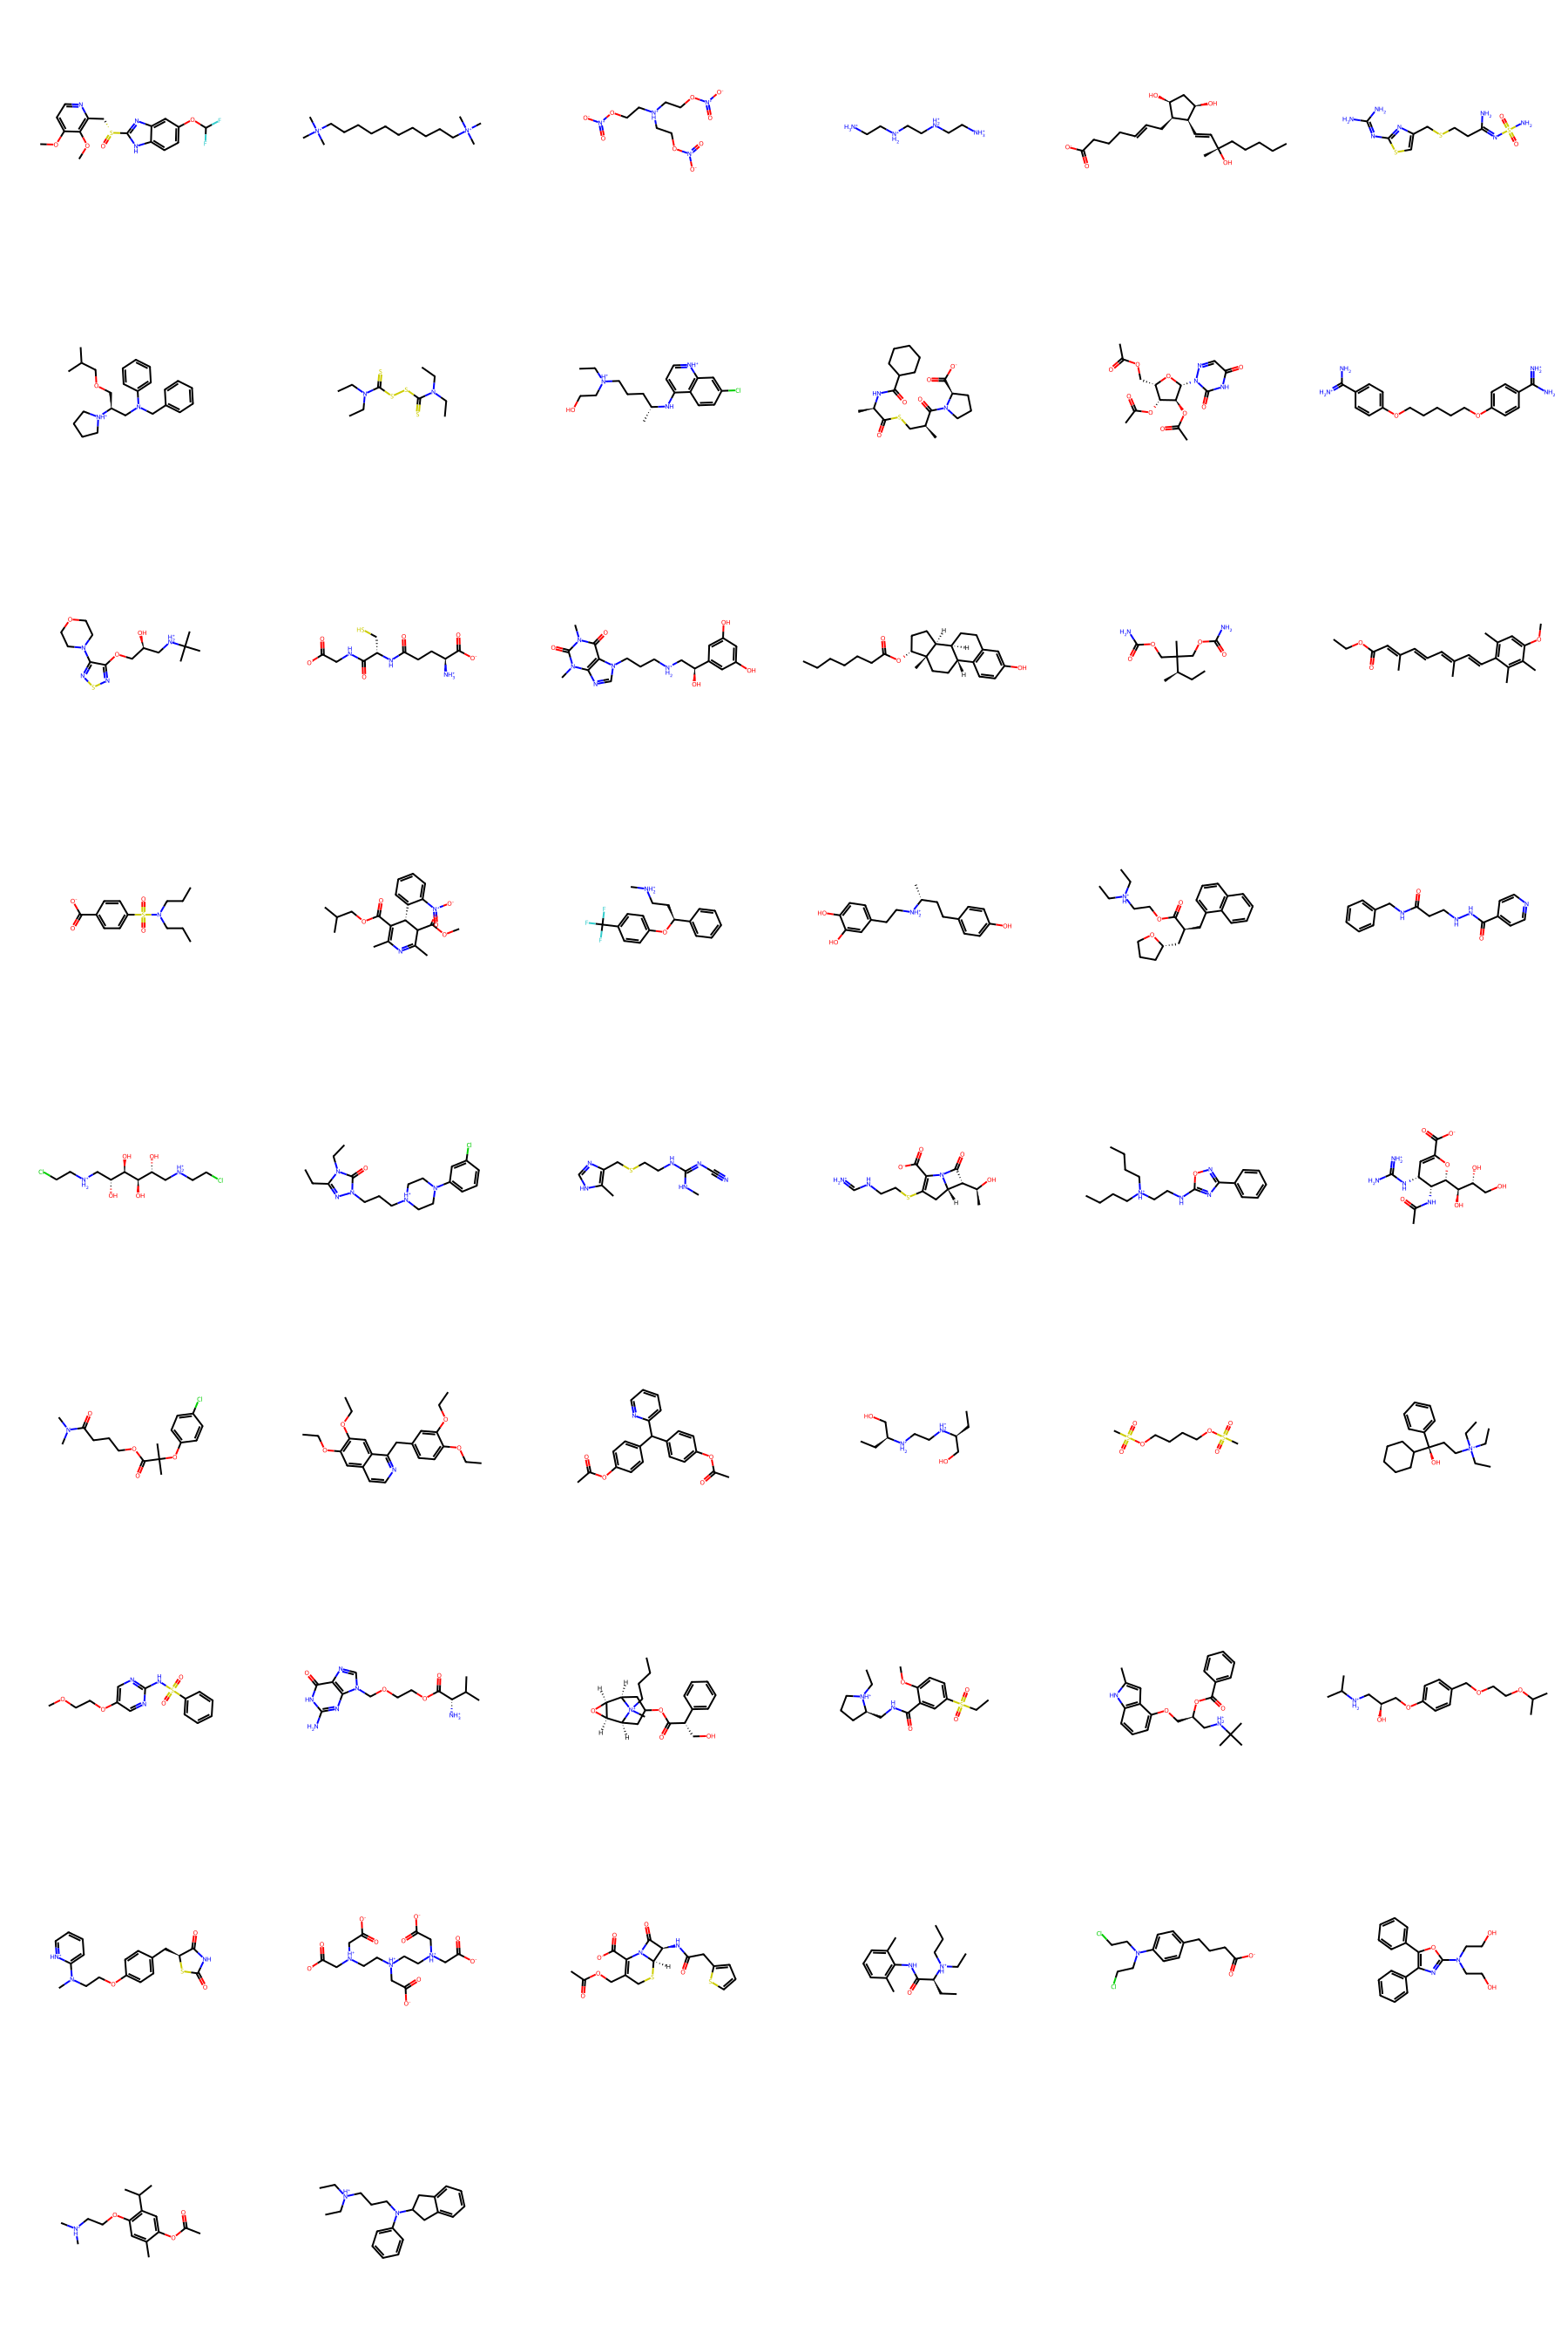

In [12]:
images = []
for molecule in picked_df['rdkit_object']:
    images.append(molecule)

print(images)
img = Draw.MolsToGridImage(images, molsPerRow=6, subImgSize=(300, 300))
img

In [13]:
list(picked_df['SMILES'])

['COc1ccnc(c1OC)C[S@@](=O)c2[nH]c3ccc(cc3n2)OC(F)F',
 'C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C',
 'C(CO[N+](=O)[O-])[NH+](CCO[N+](=O)[O-])CCO[N+](=O)[O-]',
 'C(C[NH2+]CC[NH2+]CC[NH3+])[NH3+]',
 'CCCCC[C@@](C)(/C=C/[C@@H]1[C@@H](C[C@@H]([C@@H]1CC=CCCCC(=O)[O-])O)O)O',
 'c1c(nc(s1)N=C(N)N)CSCC/C(=N/S(=O)(=O)N)/N',
 'CC(C)COC[C@@H](CN(Cc1ccccc1)c2ccccc2)[NH+]3CCCC3',
 'CCN(CC)C(=S)SSC(=S)N(CC)CC',
 'CC[NH+](CCC[C@@H](C)Nc1cc[nH+]c2c1ccc(c2)Cl)CCO',
 'C[C@@H](CSC(=O)[C@@H](C)NC(=O)C1CCCCC1)C(=O)N2CCC[C@@H]2C(=O)[O-]',
 'CC(=O)OC[C@H]1[C@H]([C@@H]([C@H](O1)n2c(=O)[nH]c(=O)cn2)OC(=O)C)OC(=O)C',
 'c1cc(ccc1C(=[NH2+])N)OCCCCCOc2ccc(cc2)C(=[NH2+])N',
 'CC(C)(C)[NH2+]C[C@@H](COc1c(nsn1)N2CCOCC2)O',
 'C(CC(=O)N[C@@H](CS)C(=O)NCC(=O)[O-])[C@@H](C(=O)[O-])[NH3+]',
 'Cn1c2c(c(=O)n(c1=O)C)n(cn2)CCC[NH2+]C[C@@H](c3cc(cc(c3)O)O)O',
 'CCCCCCC(=O)O[C@@H]1CC[C@@H]2[C@@]1(CC[C@@H]3[C@@H]2CCc4c3ccc(c4)O)C',
 'CC[C@@H](C)C(C)(COC(=O)N)COC(=O)N',
 'CCOC(=O)/C=C(\\C)/C=C/C=C(\\C)/C=C/c1c(cc(c(c1C)C)OC)C',
 'CCCN(CCC)